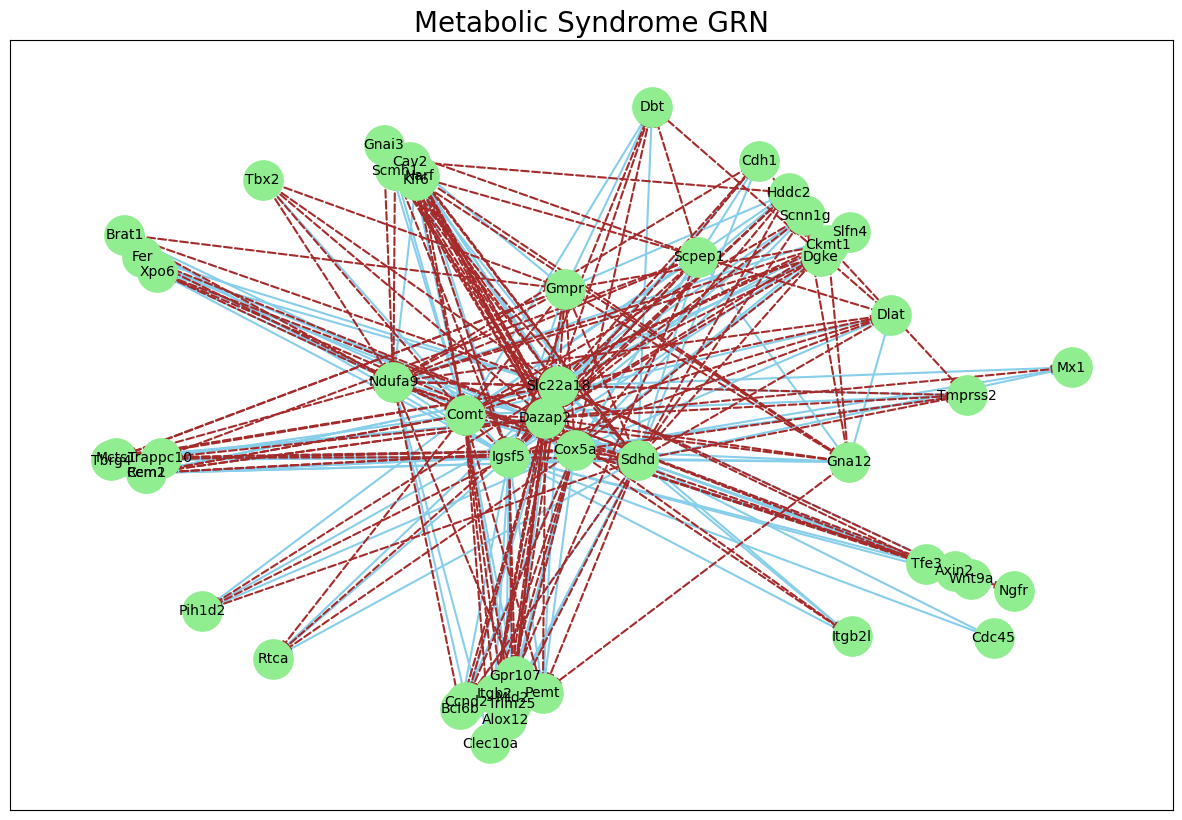

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

network_data = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/metsyn grn glasso.csv")
G = nx.from_pandas_edgelist(network_data, source='source', target='target', edge_attr='type', create_using=nx.DiGraph())
node_positions = nx.kamada_kawai_layout(G)
plt.figure(figsize=(15, 10))
activation_edges = [(source, target) for source, target, interaction in network_data.values if interaction == 1]
repression_edges = [(source, target) for source, target, interaction in network_data.values if interaction == 2]

nx.draw_networkx_nodes(G, pos=node_positions, node_size=800, node_color='lightgreen')
nx.draw_networkx_labels(G, pos=node_positions, font_size=10)
nx.draw_networkx_edges(G, pos=node_positions, edgelist=activation_edges, edge_color='skyblue', arrows=True, width=1.5)
nx.draw_networkx_edges(G, pos=node_positions, edgelist=repression_edges, edge_color='brown', style='dashed', arrows=True, width=1.5)

plt.title('Metabolic Syndrome GRN', fontsize=20)
plt.show()


Generating coarse grained GRN

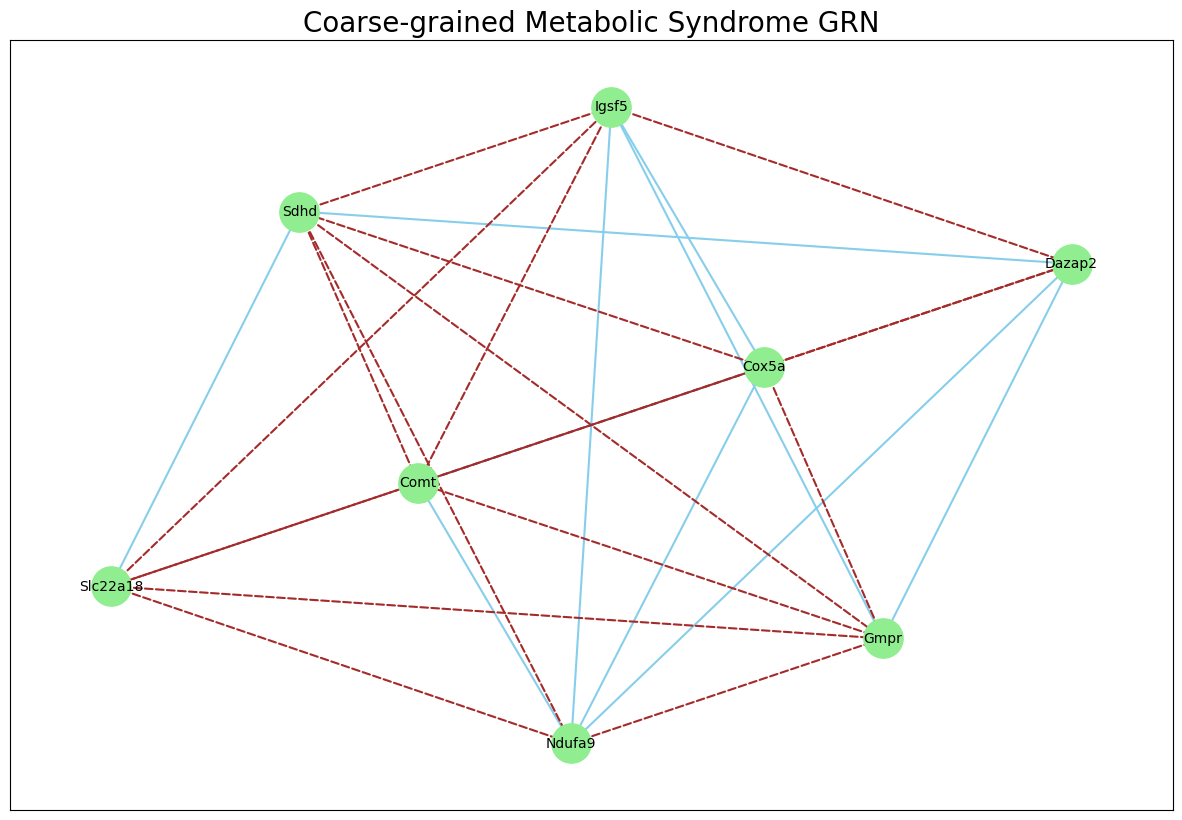

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

network_data = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/metsyn grn glasso.csv")
G = nx.from_pandas_edgelist(network_data, source='source', target='target', edge_attr='type', create_using=nx.DiGraph())
degree_centrality = nx.degree_centrality(G)
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
threshold = 0.3  
G_coarse = nx.Graph()

for node, centrality in sorted_nodes:
    if centrality >= threshold:
        G_coarse.add_node(node)

for source, target, data in G.edges(data=True):
    if source in G_coarse.nodes() and target in G_coarse.nodes():
        G_coarse.add_edge(source, target, **data)

node_positions = nx.kamada_kawai_layout(G_coarse)
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G_coarse, pos=node_positions, node_size=800, node_color='lightgreen')
nx.draw_networkx_labels(G_coarse, pos=node_positions, font_size=10)

activation_edges = [(source, target) for source, target, interaction in network_data.values if interaction == 1
                    and source in G_coarse.nodes() and target in G_coarse.nodes()]
repression_edges = [(source, target) for source, target, interaction in network_data.values if interaction == 2
                    and source in G_coarse.nodes() and target in G_coarse.nodes()]

nx.draw_networkx_edges(G_coarse, pos=node_positions, edgelist=activation_edges, edge_color='skyblue', arrows=True, width=1.5)

nx.draw_networkx_edges(G_coarse, pos=node_positions, edgelist=repression_edges, edge_color='brown', style='dashed', arrows=True, width=1.5)

plt.title('Coarse-grained Metabolic Syndrome GRN', fontsize=20)
plt.show()


In [3]:
import pandas as pd

source_list = []
target_list = []
interaction_type_list = []

for source, target, data in G_coarse.edges(data=True):
    source_list.append(source)
    target_list.append(target)
    interaction_type_list.append(data['type'])  

interaction_data_coarse = pd.DataFrame({
    'Source': source_list,
    'Target': target_list,
    'Interaction Type': interaction_type_list
})


print("Interaction data of coarse-grained GRN:")
print(interaction_data_coarse)


interaction_data_coarse.to_csv("coarse_grained_interaction_data.csv", index=False)


Interaction data of coarse-grained GRN:
      Source    Target  Interaction Type
0      Cox5a    Ndufa9                 1
1      Cox5a  Slc22a18                 2
2      Cox5a     Igsf5                 1
3      Cox5a      Sdhd                 2
4      Cox5a    Dazap2                 2
5      Cox5a      Comt                 1
6      Cox5a      Gmpr                 2
7     Dazap2    Ndufa9                 1
8     Dazap2      Comt                 2
9     Dazap2      Gmpr                 1
10    Dazap2     Igsf5                 2
11    Dazap2      Sdhd                 1
12     Igsf5  Slc22a18                 2
13     Igsf5      Gmpr                 1
14     Igsf5      Comt                 2
15     Igsf5    Ndufa9                 1
16     Igsf5      Sdhd                 2
17      Sdhd  Slc22a18                 1
18      Sdhd    Ndufa9                 2
19      Sdhd      Gmpr                 2
20      Sdhd      Comt                 2
21  Slc22a18      Gmpr                 2
22  Slc22a18     

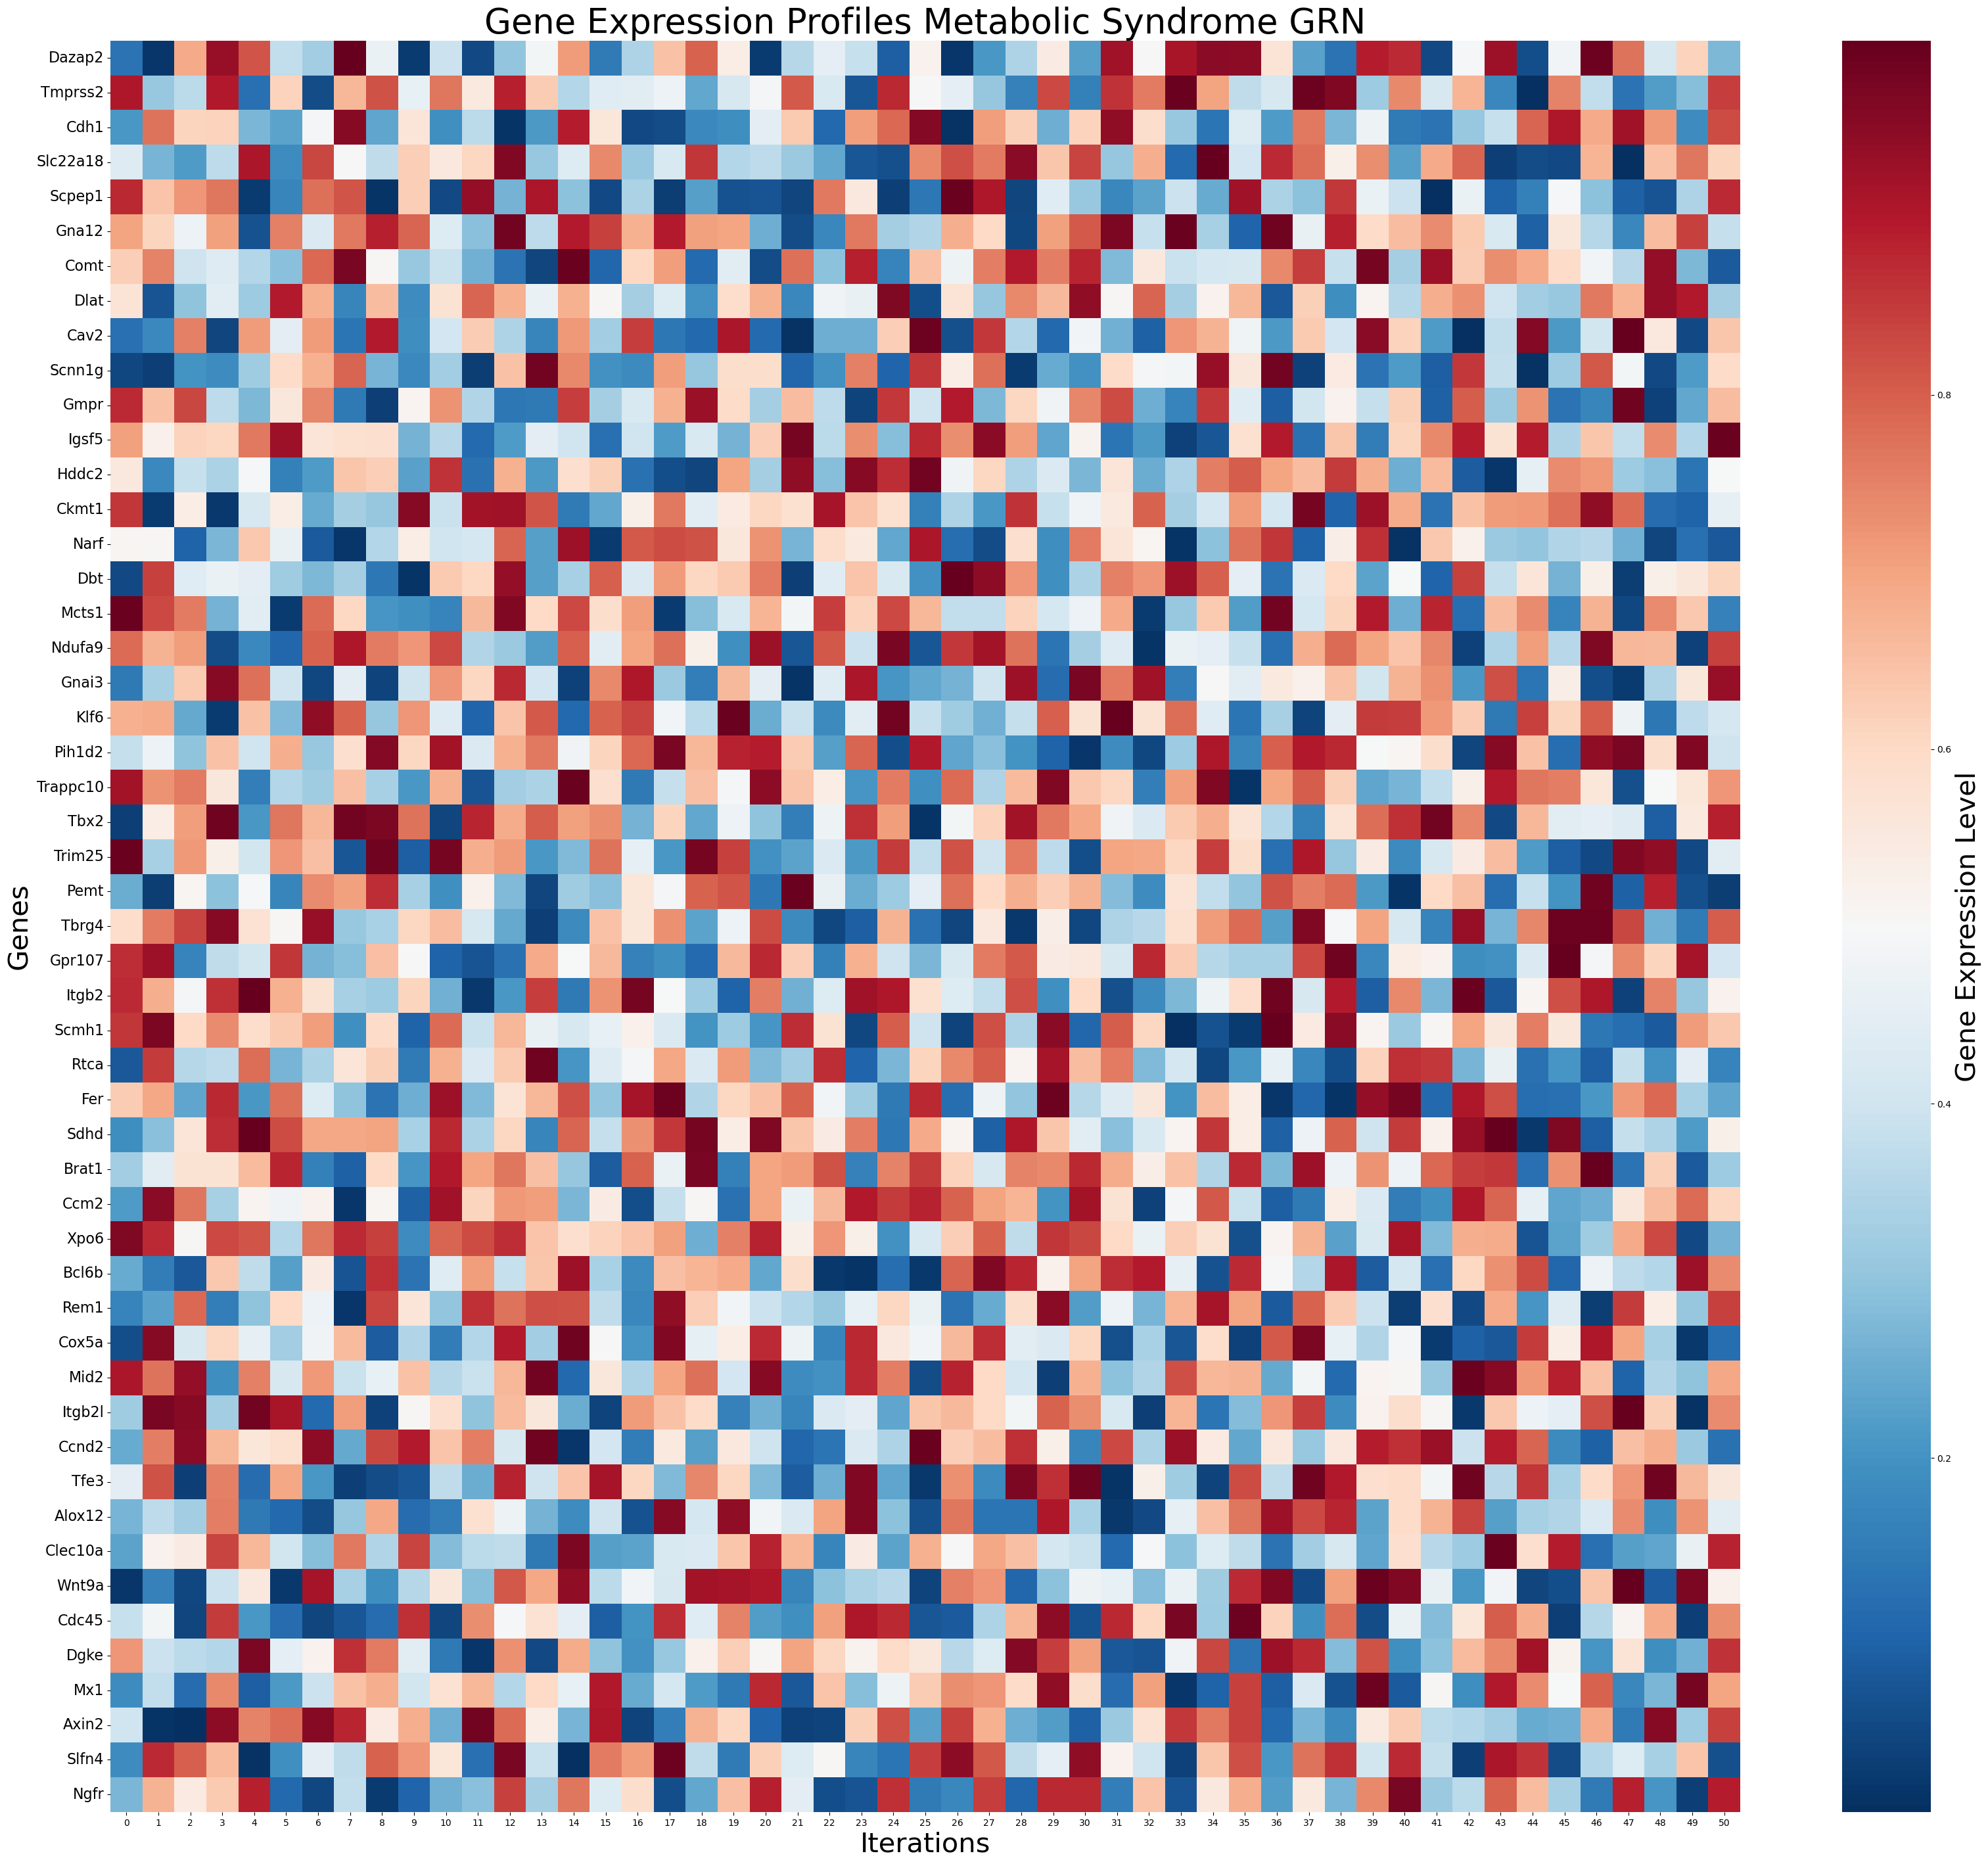

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

network_data = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/metsyn grn glasso.csv")
G = nx.from_pandas_edgelist(network_data, source='source', target='target', create_using=nx.DiGraph())

num_nodes = len(G.nodes)
num_iterations = 100
gene_expression = np.random.rand(num_iterations, num_nodes)

plt.figure(figsize=(40, 35))
ax = sns.heatmap(gene_expression, cmap='RdBu_r', cbar=True)  
ax.set_yticks(np.arange(num_nodes) + 0.5)
ax.set_yticklabels(list(G.nodes), rotation=0, fontsize=16)  
plt.title('Gene Expression Profiles Metabolic Syndrome GRN', fontsize=38)
plt.xlabel('Iterations', fontsize=30)
plt.ylabel('Genes', fontsize=30)

cbar = ax.collections[0].colorbar
cbar.set_label('Gene Expression Level', fontsize=30)  

plt.show()


In [23]:
len(gene_expression)

100

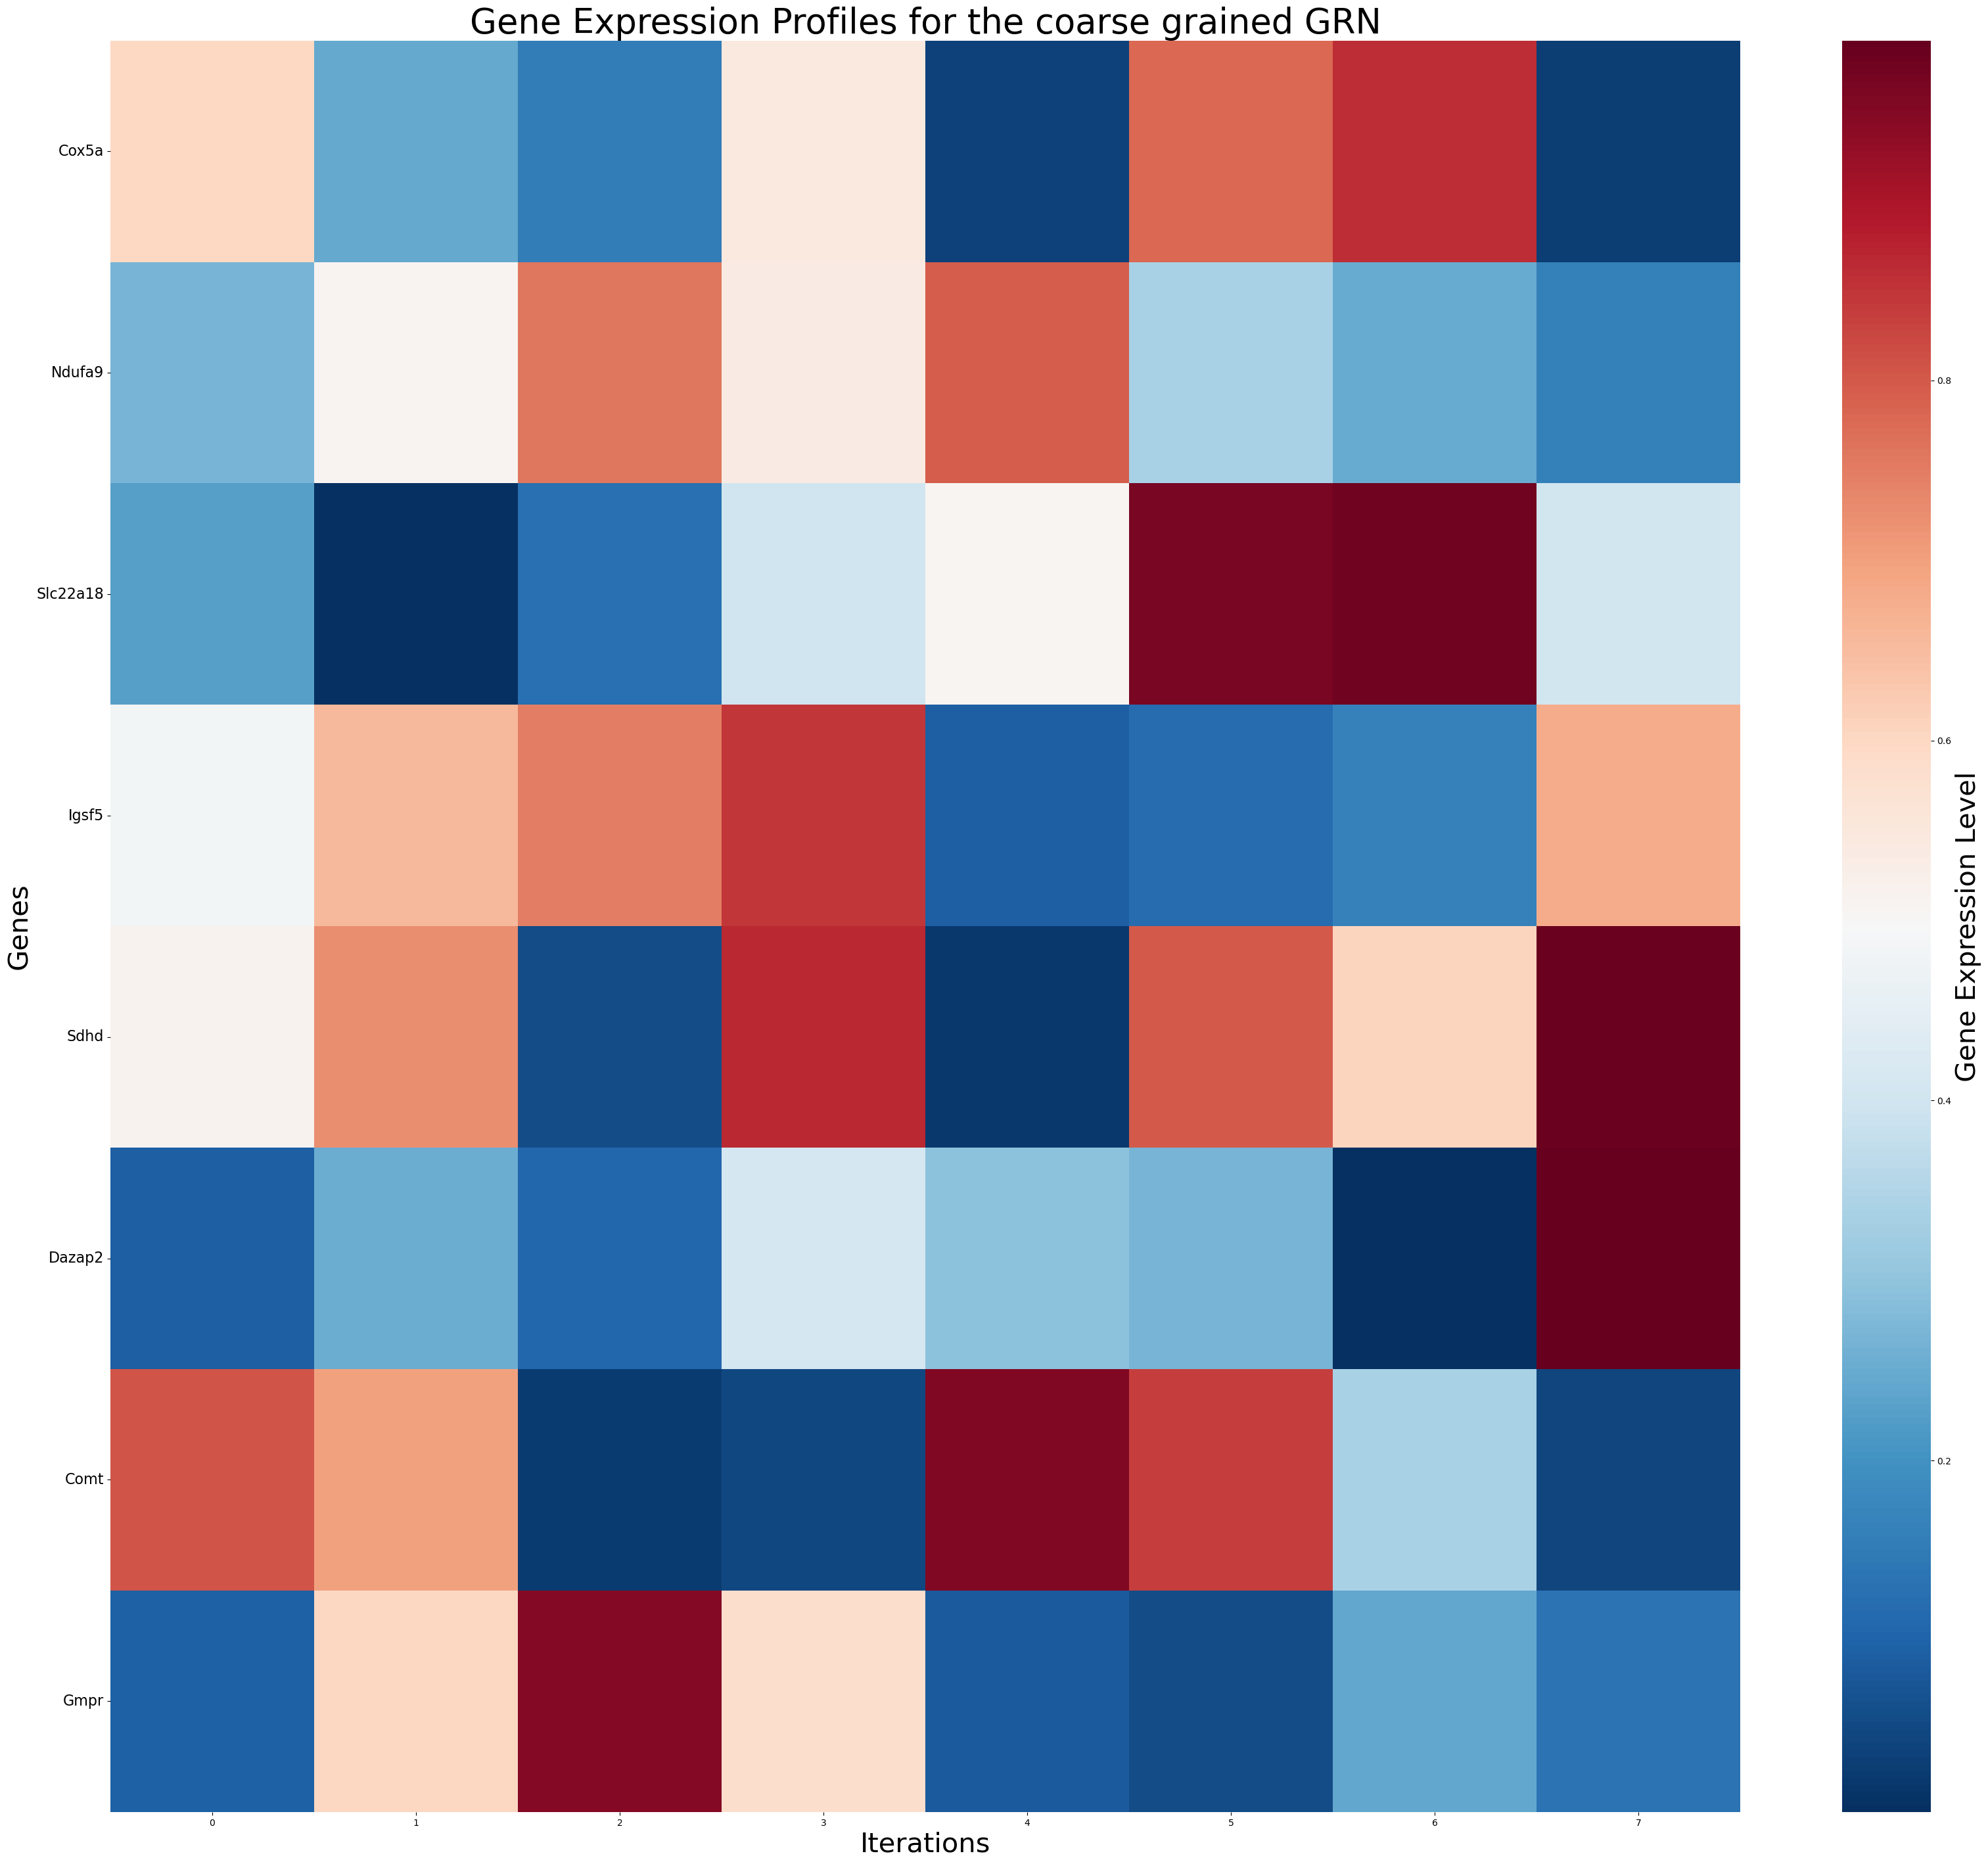

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

network_data = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/coarse_grained_interaction_data.csv")
G = nx.from_pandas_edgelist(network_data, source='Source', target='Target', create_using=nx.DiGraph())

num_nodes = len(G.nodes)
num_iterations = 8
gene_expression = np.random.rand(num_iterations, num_nodes)

plt.figure(figsize=(40, 35))
ax = sns.heatmap(gene_expression, cmap='RdBu_r', cbar=True)  
ax.set_yticks(np.arange(num_nodes) + 0.5)
ax.set_yticklabels(list(G.nodes), rotation=0, fontsize=16)  
plt.title('Gene Expression Profiles for the coarse grained GRN', fontsize=38)
plt.xlabel('Iterations', fontsize=30)
plt.ylabel('Genes', fontsize=30)

cbar = ax.collections[0].colorbar
cbar.set_label('Gene Expression Level', fontsize=30)  

plt.show()


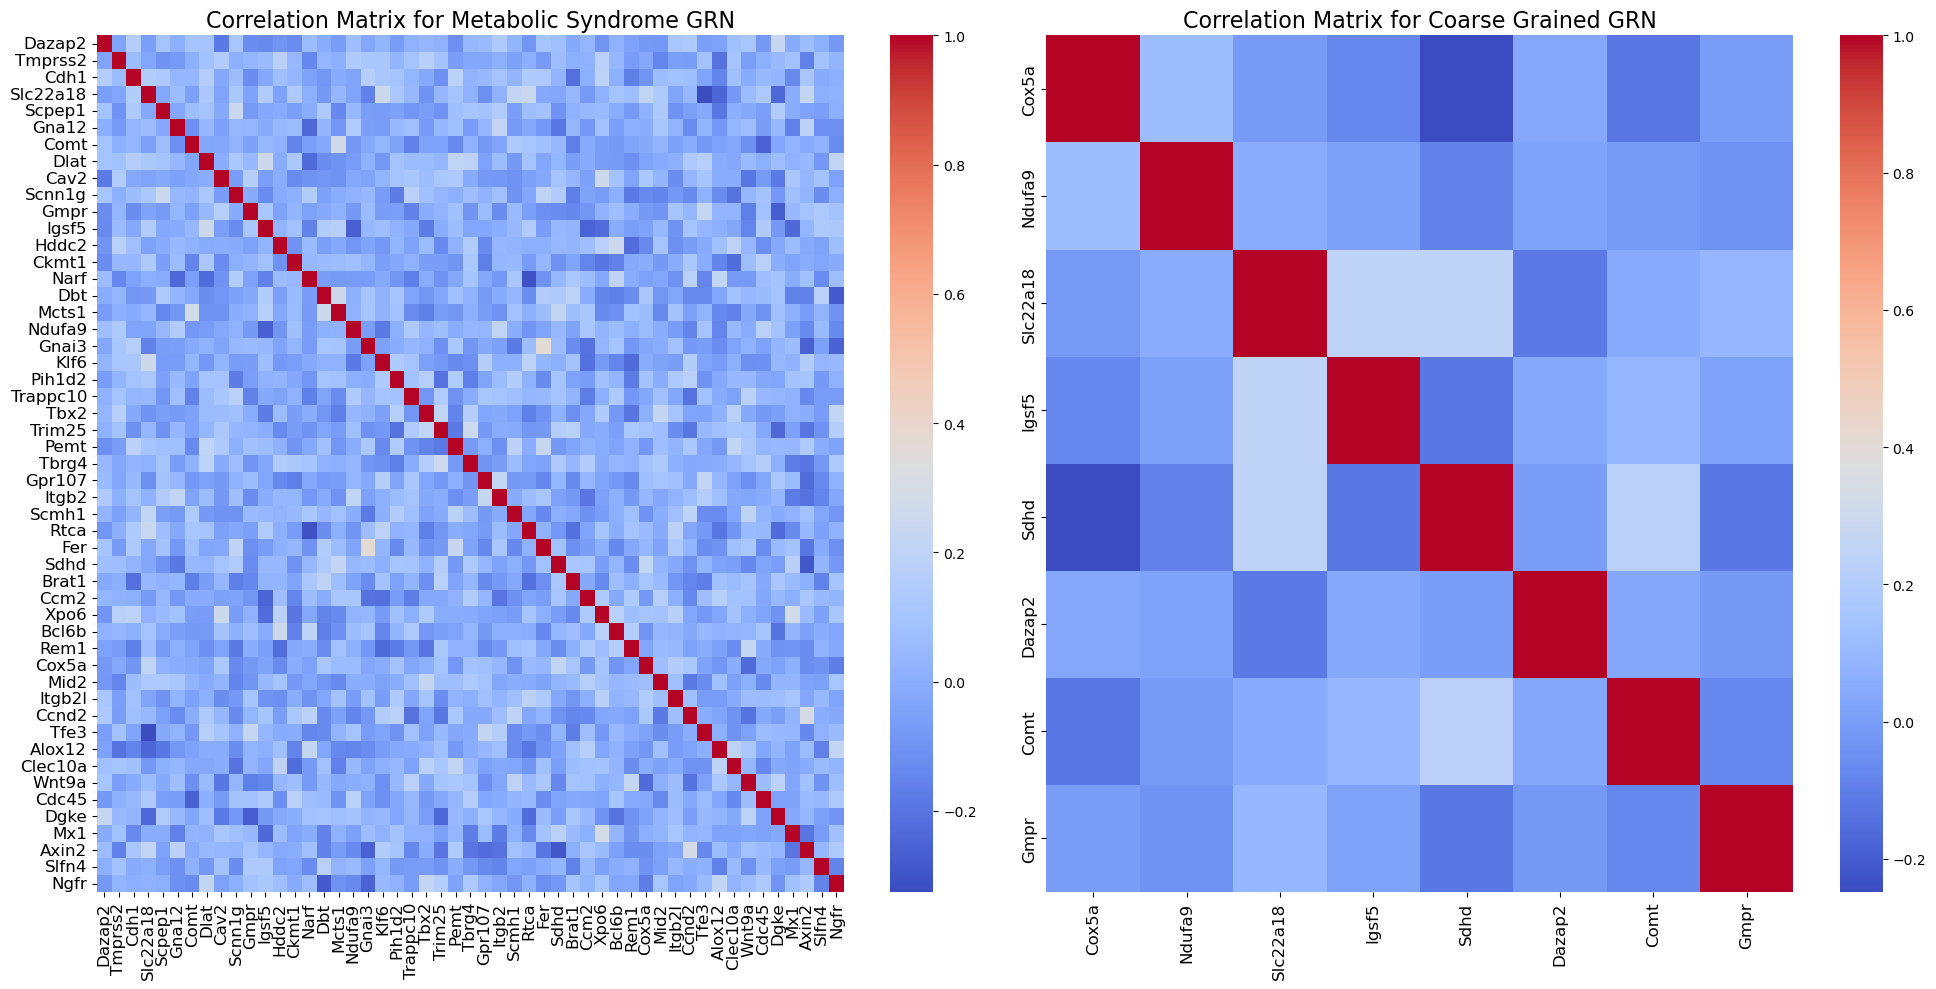

In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

network_data1 = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/metsyn grn glasso.csv")
G1 = nx.from_pandas_edgelist(network_data1, source='source', target='target', create_using=nx.DiGraph())

network_data2 = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/coarse_grained_interaction_data.csv")
G2 = nx.from_pandas_edgelist(network_data2, source='Source', target='Target', create_using=nx.DiGraph())

num_iterations = 100
gene_expression1 = np.random.rand(num_iterations, len(G1.nodes))
gene_expression2 = np.random.rand(num_iterations, len(G2.nodes))

correlation_matrix1 = np.corrcoef(gene_expression1, rowvar=False)
correlation_matrix2 = np.corrcoef(gene_expression2, rowvar=False)

gene_ids1 = list(G1.nodes())
gene_ids2 = list(G2.nodes())

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix1, cmap='coolwarm', cbar=True, annot=False, fmt=".2f", annot_kws={"size": 14},
            xticklabels=gene_ids1, yticklabels=gene_ids1)
plt.title('Correlation Matrix for Metabolic Syndrome GRN', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix2, cmap='coolwarm', cbar=True, annot=False, fmt=".2f", annot_kws={"size": 14},
            xticklabels=gene_ids2, yticklabels=gene_ids2)
plt.title('Correlation Matrix for Coarse Grained GRN', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

network_data1 = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/metsyn grn glasso.csv")
G1 = nx.from_pandas_edgelist(network_data1, source='source', target='target', create_using=nx.DiGraph())

num_nodes1 = len(G1.nodes)
num_iterations1 = 100
gene_expression1 = np.random.rand(num_iterations1, num_nodes1)

network_data2 = pd.read_csv("C:/Users/Athul Francis/Desktop/minor project/grn data collected/coarse_grained_interaction_data.csv")
G2 = nx.from_pandas_edgelist(network_data2, source='Source', target='Target', create_using=nx.DiGraph())

num_nodes2 = len(G2.nodes)
num_iterations2 = 100
gene_expression2 = np.random.rand(num_iterations2, num_nodes2)


min_num_nodes = min(num_nodes1, num_nodes2)
gene_expression1 = gene_expression1[:, :min_num_nodes]
gene_expression2 = gene_expression2[:, :min_num_nodes]


gene_expression1_flat = gene_expression1.flatten().reshape(1, -1)
gene_expression2_flat = gene_expression2.flatten().reshape(1, -1)
cosine_sim = cosine_similarity(gene_expression1_flat, gene_expression2_flat)[0, 0]

print("Cosine similarity between the two heatmaps:", cosine_sim)


Cosine similarity between the two heatmaps: 0.7491126832591405
